In [1]:
# Sample Counter object

class Counter:
    def __init__(self, start=0):
        self.current = start
                
    def next(self):
        self.current += 1
        return self.current
    
c = Counter()
print(c.next())
print(c.next())
print(c.next())

1
2
3


In [2]:
import math

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We have been using objects since we began with Python, since everything is an object.

In [4]:
a_number = 1
a_string = "Hello!"
a_list = ["a", "b"]
a_dict = {"A": 1}
a_set = {1, 2, 3}
def a_function(x):
    return x

print(type(a_number))
print(type(a_string))
print(type(a_list))
print(type(a_dict))
print(type(a_set))
print(type(a_function))

<class 'int'>
<class 'str'>
<class 'list'>
<class 'dict'>
<class 'set'>
<class 'function'>


Note that each one of those outputs has the word `class`. A _class_ is the type of an object, and a blueprint for how it works.

We can use `dir` to see all the methods of an object.

In [5]:
dir(a_set)

['__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

All the methods with `__` in front of them are _private methods_. Nothing prevents you from calling them, but they aren't meant for public use. Most of them are called in other ways. For example, `__str__` is called when you pass an object to the `str` function.

## Creating your own classes

We can create our own classes for use. So far, we haven't needed them. So, when do you need classes?

Classes are useful because objects contain both _state_ and _behavior_. When your behavior is coupled to your state, a class can be useful.

Note that **any code written with classes can be written without them**. Sometimes it's easier to go with classes, though.

How do we write a class?

In [ ]:
# Name of object class.
class Person:
    
    # Sets up the initial state of the object.
    # Note the initial argument of _self_.
    def __init__(self, name):
        self.name = name
        
    # Adds behavior.
    # Note the initial argument of _self_.    
    def greet(self):
        print("Hello, my name is {name}. It is nice to meet you!".format(name=self.name))

In [ ]:
kendall = Person("Kendall")
kendall.greet()

In [6]:
class Clicker:
    """Counts up from 0 (or the initial count) every time you call .click()."""
    
    def __init__(self, initial_count=0):
        self.count = initial_count
        
    def click(self):
        self.count += 1

In [7]:
clicker = Clicker()

# I can get attributes out of my objects.
clicker.count

0

Note above that when I use an property, there's no parentheses.

```py
object.method()
object.property
```

In [8]:
for _ in range(5):
    clicker.click()
    
clicker.count

5

Classes can have as many methods as you need.

In [10]:
class Point:
    """A coordinate on a Cartesian plane."""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        """Calculate the distance between this point and another point."""
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)
    
    def quadrant(self):
        """Calculates which quadrant of the Cartesian plane this point is in.
        
        Crude diagram:
        
          4  |  1
             |
        -----------
             |
          3  |  2
          
        For purposes of this calculation, zero counts as a positive number.
        """
        if x >= 0 and y >= 0:
            return 1
        elif x >= 0:
            return 2
        elif y < 0:
            return 3
        else:
            return 4
        
    def rotate(self, quarters=1):
        """Rotate the point around the center for some number of quarter turns."""
        if quarters is 1:
            return Point(self.y, -self.x)
        else:
            return Point(self.y, -self.x).rotate(quarters - 1)
    
    def __str__(self):
        """String representation of a point."""
        return "Point({}, {})".format(self.x, self.y)
    
    def __repr__(self):
        """Representation by Python output."""
        return self.__str__()

In [11]:
p1 = Point(2, 3)

In [12]:
p1.rotate()

Point(3, -2)

In [13]:
p1.rotate(2)

Point(-2, -3)

In [14]:
p1.rotate(10)

Point(-2, -3)

Generally, classes interact with each other.

In [15]:
class LineSegment:
    def __init__(self, point1, point2):
        self.p1 = point1
        self.p2 = point2
        
    def slope(self):
        """Find the slope of this segment on the plane."""
        return (self.p1.y - self.p2.y) / (self.p1.x - self.p2.x)
    
    def midpoint(self):
        """Find the point in the middle of this segment."""
        x = (self.p1.x + self.p2.x) / 2
        y = (self.p1.y + self.p2.y) / 2
        return Point(x, y)
    
    def rotate(self, quarters=1):
        """Rotate the segment around the center for some number of quarter turns."""
        return LineSegment(self.p1.rotate(quarters), self.p2.rotate(quarters))
    
    def __repr__(self):
        return "LineSegment({}, {})".format(self.p1, self.p2)


In [16]:
seg = LineSegment(Point(-3, 0.5), Point(2, 1))
print(seg)

LineSegment(Point(-3, 0.5), Point(2, 1))


In [17]:
seg.midpoint()

Point(-0.5, 0.75)

In [18]:
seg.rotate()

LineSegment(Point(0.5, 3), Point(1, -2))

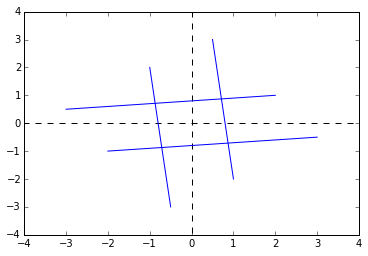

In [19]:
plt.axis([-4, 4, -4, 4])
plt.plot([-5, 5], [0, 0], '--k')
plt.plot([0, 0], [-5, 5], '--k')
seg = seg.rotate()
plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], '-b')
seg = seg.rotate()
plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], '-b')
seg = seg.rotate()
plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], '-b')
seg = seg.rotate()
plt.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], '-b')

In [21]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return "Point({}, {})".format(self.x, self.y)

    def __str__(self):
        return "({}, {})".format(self.x, self.y)

In [22]:
p = Point(3, 4)

In [23]:
p

Point(3, 4)

In [24]:
str(p)

'(3, 4)'

## Inheritance (here be dragons)

Inheritance lets you create _subclasses_: classes that inherit all the behavior of their parent class, but can add or override that.

Inheritance is not always the right answer for objects, but every once in a while it makes sense.

In [26]:
# A set of classes for planning a conference.

class Attendee:
    def __init__(self, name, email):
        self.name = name
        self.email = email
        self.checked_in = False
        
    def badge_text(self):
        return self.name
    
    def check_in(self):
        self.checked_in = True
        
class Talk:
    def __init__(self, name):
        self.name = name
        
class Speaker(Attendee):
    def __init__(self, name, email, talks):
        super().__init__(name, email)
        self.talks = talks
        
    def badge_text(self):
        return "\n".join([self.name, "Speaker"])
        
class Vendor(Attendee):
    def __init__(self, name, email, company):
        super().__init__(name, email)
        self.company = company
        
    def badge_text(self):
        return "\n".join([self.name, self.company])

`super()` is how we get access to the parent class's methods.

In [27]:
scout = Attendee("Scout", "scout@example.org")
cadence = Speaker("Cadence", "cadence@example.org", talks=[Talk("How to Make Objects")])
avery = Vendor("Avery", "avery@example.org", company="Dunster")

In [28]:
print(scout.badge_text())
print("---")
print(cadence.badge_text())
print("---")
print(avery.badge_text())

Scout
---
Cadence
Speaker
---
Avery
Dunster


In [29]:
scout.check_in()
cadence.check_in()
avery.check_in()
print(scout.checked_in, cadence.checked_in, avery.checked_in)

True True True


In [30]:
print(scout)
print(cadence)
print(avery)

Multiple inheritance also exists, where you can inherit from several classes. We will not cover this until we have a compelling use case for it.